## Ide feature extraction

1. floors_before_eq (total) -> Structured parse pake LLM
2. old_building -> standarisasi?
3. plinth_area -> Structured parse pake LLM
4. height_before_eq -> standarisasi
5. land_surface_condition -> OHE
6. type_of_foundation -> OHE
7. type_of_roof -> OHE
8. type_of_ground_floor -> OHE
9. type_of_other_floor -> OHE
10. position -> OHE
11. building_plan_configuration -> OHE
12. technical_solution_proposed -> OHE (aku ga ngerti apa ada pengaruhnya fitur ini dengan damage_grade)
13. legal_ownership_status -> benerin dulu, LE
14. has_secondary_use -> 
15. type_of_reinforcement_concrete -> OHE
16. residential_type -> OHE
17. no_family_residing -> OHE (aku ga ngerti apa ada pengaruhnya fitur ini dengan damage_grade)
18. public_place_type -> OHE
19. industrial_use_type -> OHE
20. govermental_use_type -> OHE
21. flexible_superstructure -> OHE
22. wall_binding -> OHE
23. wall_material -> OHE
24. damage_grade -> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("../../dataset/raw/train.csv", )
train.drop(["Unnamed: 0"], axis=1, inplace=True)
train.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,floor two,1.0,256 ft^2,22.0,Flat,Bamboo or Timber,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,0.0,0.0,1.0
1,Floor 3,3.0,985 ft^2,18.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
2,Two Floor,7.0,NaN,14.0,Flat,Mud mortar-Stone/Brick,NaN,Clay,Wood-Mud or Bamboo Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,two,18.0,185 ft^2,15.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
4,just 2 floor,22.0,290 ft^2,17.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,Timber Mud or Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,1.0


In [3]:
print(train.shape)
train.dropna(inplace=True)
print(train.shape)

(722815, 24)
(46801, 24)


In [4]:
train.reset_index(inplace=True)
train.drop(["index"], axis=1, inplace=True)

In [5]:
train.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,Has 1 floor,22.0,300 ft^2,10.0,Moderate slope,Clay Sand Mixed mortar-Stone/Brick,Bamboo/Timber Light roof,mud,Not applicable,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
1,Three floor,22.0,360 ft^2,18.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
2,Floor 2,8.0,380 ft^2,17.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Brick or Stone,Timber-Planck,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,two,22.0,250 ft^2,14.0,Flat,Clay mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
4,Floor two,7.0,312 ft^2,13.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,available,5.0,2.0,2.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46801 entries, 0 to 46800
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   floors_before_eq (total)        46801 non-null  object 
 1   old_building                    46801 non-null  float64
 2   plinth_area (ft^2)              46801 non-null  object 
 3   height_before_eq (ft)           46801 non-null  float64
 4   land_surface_condition          46801 non-null  object 
 5   type_of_foundation              46801 non-null  object 
 6   type_of_roof                    46801 non-null  object 
 7   type_of_ground_floor            46801 non-null  object 
 8   type_of_other_floor             46801 non-null  object 
 9   position                        46801 non-null  object 
 10  building_plan_configuration     46801 non-null  object 
 11  technical_solution_proposed     46801 non-null  object 
 12  legal_ownership_status          

## Clean

In [7]:
train_cp = train.copy()
angka = {
    "one": 1,
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "seven": 7,
    "eight": 8,
    "nine": 9,
    "1st": 1,
    "2nd": 2,
    "3rd": 3,
    "fifth": 5,
    "second": 2,
    "third": 3,
    "3.00": 3,
}

delete = {
    "story": "",
    "stories": "",
    "floor": "",
    "floors": "",
    "has": "",
    "there is": "",
    "just": "",
    "-": "",
    "fl": "",
    "/": "",
}

train_cp["floors_before_eq (total)"] = train_cp["floors_before_eq (total)"]\
                                            .str.lower()\
                                            .replace(delete, regex=True)\
                                            .str.strip()\
                                            .replace(angka, regex=True)

train_cp["floors_before_eq (total)"] = train_cp["floors_before_eq (total)"].astype(
    "float")
train_cp.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,1.0,22.0,300 ft^2,10.0,Moderate slope,Clay Sand Mixed mortar-Stone/Brick,Bamboo/Timber Light roof,mud,Not applicable,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
1,3.0,22.0,360 ft^2,18.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
2,2.0,8.0,380 ft^2,17.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Brick or Stone,Timber-Planck,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,2.0,22.0,250 ft^2,14.0,Flat,Clay mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
4,2.0,7.0,312 ft^2,13.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,available,5.0,2.0,2.0


In [8]:
train_cp["plinth_area (ft^2)"] = train_cp["plinth_area (ft^2)"].str.lower()
train_cp["plinth_area (ft^2)"] = train_cp["plinth_area (ft^2)"].apply(
    lambda x: x.replace(" ft^2", ""))
train_cp["plinth_area (ft^2)"] = train_cp["plinth_area (ft^2)"].apply(
    lambda x: x.replace("more than ", ""))
train_cp["plinth_area (ft^2)"] = train_cp["plinth_area (ft^2)"].astype("float")


In [9]:
type_of_foundation_dict = {
    # "Mud mortar-Stone/Brick": "Clay mortar-Stone/Brick",
    "Bamboo/TImber": "Bamboo or Timber",
    "Bamboo/Timber": "Bamboo or Timber",
    "RC": "Reinforced Concrete",
    "Others": "Other",
    "Cement-Stone or Cement-Brick": "Cement-Stone/Brick"
}

train_cp["type_of_foundation"] = train_cp["type_of_foundation"]\
                                    .replace(type_of_foundation_dict)\
                                    .str.strip()

train_cp.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,1.0,22.0,300.0,10.0,Moderate slope,Clay Sand Mixed mortar-Stone/Brick,Bamboo/Timber Light roof,mud,Not applicable,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
1,3.0,22.0,360.0,18.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
2,2.0,8.0,380.0,17.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Brick or Stone,Timber-Planck,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,2.0,22.0,250.0,14.0,Flat,Clay mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
4,2.0,7.0,312.0,13.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,available,5.0,2.0,2.0


In [10]:
type_of_roof_dict = {
    "Bamboo/TImber-Heavy Roof": "Bamboo/Timber Heavy roof",
    "Bamboo/TImber-Light Roof": "Bamboo or Timber Light roof",
    "Bamboo/Timber Light roof": "Bamboo or Timber Light roof ",
    "reinforced cement concrete/rb/rbc": "rcc/rb/rbc",
    "Reinforced brick concrete/rcc/rbc": "rcc/rb/rbc",
    "Bamboo or Timber Heavy roof": "Bamboo/Timber Heavy roof",
    "Reinforced Brick Slab/rcc/rbc": "rcc/rb/rbc",
}

train_cp["type_of_roof"] = train_cp["type_of_roof"].replace(type_of_roof_dict).str.strip()

train_cp.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,1.0,22.0,300.0,10.0,Moderate slope,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,mud,Not applicable,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
1,3.0,22.0,360.0,18.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
2,2.0,8.0,380.0,17.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Brick or Stone,Timber-Planck,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,2.0,22.0,250.0,14.0,Flat,Clay mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
4,2.0,7.0,312.0,13.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,available,5.0,2.0,2.0


In [11]:
type_of_ground_floor_dict = {
    "rc": "reinforced concrete",
    "brick/stone": "brick or stone",
    # "lumber": "wood",
    # "timber": "wood",
    # "mud": "clay"
}

train_cp["type_of_ground_floor"] = train_cp["type_of_ground_floor"].str.lower()\
    .replace(type_of_ground_floor_dict)\

train_cp.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,1.0,22.0,300.0,10.0,Moderate slope,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,mud,Not applicable,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
1,3.0,22.0,360.0,18.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
2,2.0,8.0,380.0,17.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,brick or stone,Timber-Planck,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,2.0,22.0,250.0,14.0,Flat,Clay mortar-Stone/Brick,Bamboo or Timber Light roof,clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
4,2.0,7.0,312.0,13.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,available,5.0,2.0,2.0


In [12]:
type_of_other_floor_dict = {
    # "lumber-plank": "wood-plank",
    # "timber-planck": "wood-plank",
    "timber/bamboo-mud": "wood-mud or bamboo mud",
    "reinforced cement concrete/rb/rbc": "rcc/rb/rbc",
    "wood or bamboo mud": "wood-mud or bamboo mud",
    "timber mud or bamboo-mud": "wood-mud or bamboo mud"
}

train_cp["type_of_other_floor"] = train_cp["type_of_other_floor"]\
    .str.lower()\
    .replace(type_of_other_floor_dict)

train_cp["type_of_other_floor"].value_counts()


wood-mud or bamboo mud               30033
not applicable                        7197
timber-planck                         3405
lumber-plank                          3028
rcc/rb/rbc                            1917
wood-plank                            1145
reinforced brick concrete/rcc/rbc       76
Name: type_of_other_floor, dtype: int64

In [13]:
train_cp['no_family_residing'] = train_cp['no_family_residing'].replace(
    'None', '0.0').astype('float')

train_cp['no_family_residing'].value_counts()

1.0    39405
0.0     4436
2.0     2545
3.0      316
4.0       76
5.0       16
6.0        4
7.0        2
8.0        1
Name: no_family_residing, dtype: int64

In [14]:
train_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46801 entries, 0 to 46800
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   floors_before_eq (total)        46801 non-null  float64
 1   old_building                    46801 non-null  float64
 2   plinth_area (ft^2)              46801 non-null  float64
 3   height_before_eq (ft)           46801 non-null  float64
 4   land_surface_condition          46801 non-null  object 
 5   type_of_foundation              46801 non-null  object 
 6   type_of_roof                    46801 non-null  object 
 7   type_of_ground_floor            46801 non-null  object 
 8   type_of_other_floor             46801 non-null  object 
 9   position                        46801 non-null  object 
 10  building_plan_configuration     46801 non-null  object 
 11  technical_solution_proposed     46801 non-null  object 
 12  legal_ownership_status          

In [15]:
train_cp["residential_type"] = train_cp["residential_type"].replace({
    "Other Residential Type": "Other"
})

train_cp["residential_type"].value_counts()

Non-residential       44591
Hotel/Motel            1640
Rental Residential      368
Housing                 180
Other                    22
Name: residential_type, dtype: int64

In [16]:
train_cp['govermental_use_type'] = train_cp['govermental_use_type'].replace(
    ['Police Offices'], 'Govermental Buildings')

In [17]:
train_cp["public_place_type"] = train_cp["public_place_type"]\
    .apply(lambda x: "Public" if x != "Non-public" else "Non-public")

In [18]:
legal_ownership_status_dict = {
    "Private": "Private",
    "Private Use": "Private",
    "Prvt": "Private",
    "Privste": "Private",
    "Public Use": "Public",
    "Public Space": "Public",
    "Institutional Use": "Institutional",
    "Institutionals": "Institutional",
    "Unknown": "Other",
    "Unspecified": "Other",
}

train_cp["legal_ownership_status"] = train_cp["legal_ownership_status"].str.strip().replace(legal_ownership_status_dict)
train_cp["legal_ownership_status"].value_counts()

Private          44824
Public            1244
Institutional      490
Other              243
Name: legal_ownership_status, dtype: int64

In [19]:
train_cp["wall_binding"].value_counts()

5.0    37775
0.0     4376
2.0     3406
1.0      722
7.0      507
3.0       15
Name: wall_binding, dtype: int64

In [20]:
train_cp.to_csv("../../dataset/processed/train_cleaned_v2.csv", index=False)

## Encode

In [21]:
train_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46801 entries, 0 to 46800
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   floors_before_eq (total)        46801 non-null  float64
 1   old_building                    46801 non-null  float64
 2   plinth_area (ft^2)              46801 non-null  float64
 3   height_before_eq (ft)           46801 non-null  float64
 4   land_surface_condition          46801 non-null  object 
 5   type_of_foundation              46801 non-null  object 
 6   type_of_roof                    46801 non-null  object 
 7   type_of_ground_floor            46801 non-null  object 
 8   type_of_other_floor             46801 non-null  object 
 9   position                        46801 non-null  object 
 10  building_plan_configuration     46801 non-null  object 
 11  technical_solution_proposed     46801 non-null  object 
 12  legal_ownership_status          

In [72]:
ordinal_col = ["land_surface_condition", "technical_solution_proposed"]
binary_col = ["flexible_superstructure", "public_place_type", "govermental_use_type", "has_secondary_use"]
numerical_col = ["floors_before_eq (total)", "old_building",
                 "plinth_area (ft^2)", "height_before_eq (ft)"]
target_col = ["damage_grade"]
categorical_col_lt5 = [col for col in train_cp.columns if col not in ordinal_col + binary_col + numerical_col + target_col and train_cp[col].nunique() <= 4] 
cat_col = [col for col in train_cp.columns if col not in ordinal_col + binary_col + numerical_col + target_col and train_cp[col].nunique() >= 5]

In [23]:
land_surface_condition_dict = {
    "Steep slope" : 0,
    "Moderate slope": 1,
    "Flat": 2,
}

train_cp["land_surface_condition"] = train_cp["land_surface_condition"].replace(land_surface_condition_dict)

technical_solution_proposed_dict = {
    "Reconstruction": 0,
    "Major repair": 1,
    "Minor repair": 2,
    "No need": 3,
}

train_cp["technical_solution_proposed"] = train_cp["technical_solution_proposed"].replace(technical_solution_proposed_dict)

flexible_superstructure_dict = {
    "unavailable": 0,
    "available": 1,
}

train_cp["flexible_superstructure"] = train_cp["flexible_superstructure"].replace(
    flexible_superstructure_dict)

public_place_type_dict = {
    "Public": 0,
    "Non-public": 1,
}

train_cp["public_place_type"] = train_cp["public_place_type"].replace(
    public_place_type_dict)

governmental_use_type_dict = {
    "Govermental Buildings": 0,
    "Non-govermental": 1,
}

train_cp["govermental_use_type"] = train_cp["govermental_use_type"].replace(
    governmental_use_type_dict)


In [24]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# ohe_df = pd.DataFrame(ohe.fit_transform(train_cp[categorical_col_lt5]))
# ohe_df.columns = ohe.get_feature_names(categorical_col_lt5)

# train_ohe = train_cp.copy() 
# for cat in categorical_col_lt5:
#     train_ohe.drop(cat, axis=1, inplace=True)

# print(train_ohe.shape)

# train_ohe_merge = pd.concat([train_ohe, ohe_df], axis=1)

# print(train_ohe_merge.shape)

In [25]:
# train_ohe_merge["volume_building"] = train_ohe_merge["plinth_area (ft^2)"] * train_ohe_merge["height_before_eq (ft)"]
# train_ohe_merge


In [26]:
# from sklearn.preprocessing import RobustScaler

# s = RobustScaler()
train_ohe_merge = train_cp.copy()
# train_ohe_merge[numerical_col] = s.fit_transform(
#     train_ohe_merge[numerical_col])

# train_ohe_merge.head()


In [73]:
from category_encoders.target_encoder import TargetEncoder
 
enc = TargetEncoder(cols=cat_col + categorical_col_lt5, smoothing=10)
enc.fit(train_ohe_merge[cat_col + categorical_col_lt5], train_ohe_merge["damage_grade"])
enc_df = train_ohe_merge.copy()
enc_df[cat_col + categorical_col_lt5] = enc.transform(train_ohe_merge[cat_col + categorical_col_lt5])
enc_df.head()


,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,1.0,22.0,300.0,10.0,1,3.921709,3.747907,3.847860,2.981242,3.637114,...,3.739428,3.692359,3.372633,1,3.635343,1,0,3.96323,3.966212,5.0
1,3.0,22.0,360.0,18.0,2,3.924681,3.806631,3.837207,3.899777,3.637114,...,3.739428,3.692359,3.666844,1,3.635343,1,0,3.96323,3.966212,4.0
2,2.0,8.0,380.0,17.0,2,3.924681,3.743924,3.741800,3.725698,3.637114,...,3.739428,3.692359,3.666844,1,3.635343,1,0,3.96323,3.966212,5.0
3,2.0,22.0,250.0,14.0,2,3.924681,3.747907,3.837207,3.899777,3.637114,...,3.739428,3.692359,3.372633,1,3.635343,1,0,3.96323,3.966212,5.0
4,2.0,7.0,312.0,13.0,2,3.921709,3.747907,3.837207,3.899777,3.637114,...,3.739428,3.692359,3.666844,1,3.635343,1,1,3.96323,3.966212,2.0


In [74]:
enc_df["damage_grade"] = enc_df["damage_grade"].astype('int')
enc_df["damage_grade"] = enc_df["damage_grade"] - 1
enc_df.to_csv("../../dataset/processed/train_encoded_v3_allTE.csv", index=False)

In [75]:

def clean(df):
    angka = {
        "one": 1,
        "two": 2,
        "three": 3,
        "four": 4,
        "five": 5,
        "six": 6,
        "seven": 7,
        "eight": 8,
        "nine": 9,
        "1st": 1,
        "2nd": 2,
        "3rd": 3,
        "fifth": 5,
        "second": 2,
        "third": 3,
        "3.00": 3,
    }

    delete = {
        "story": "",
        "stories": "",
        "floor": "",
        "floors": "",
        "has": "",
        "there is": "",
        "just": "",
        "-": "",
        "fl": "",
        "/": "",
    }

    df["floors_before_eq (total)"] = df["floors_before_eq (total)"]\
        .str.lower()\
        .replace(delete, regex=True)\
        .str.strip()\
        .replace(angka, regex=True)

    df["floors_before_eq (total)"] = df["floors_before_eq (total)"].astype(
        "float")
    df["plinth_area (ft^2)"] = df["plinth_area (ft^2)"].str.lower()

    df["plinth_area (ft^2)"] = df["plinth_area (ft^2)"].apply(
        lambda x: x.replace(" ft^2", ""))
    df["plinth_area (ft^2)"] = df["plinth_area (ft^2)"].apply(
        lambda x: x.replace("more than ", ""))
    df["plinth_area (ft^2)"] = df["plinth_area (ft^2)"].astype(
        "float")

    type_of_foundation_dict = {
        # "Mud mortar-Stone/Brick": "Clay mortar-Stone/Brick",
        "Bamboo/TImber": "Bamboo or Timber",
        "Bamboo/Timber": "Bamboo or Timber",
        "RC": "Reinforced Concrete",
        "Others": "Other",
        "Cement-Stone or Cement-Brick": "Cement-Stone/Brick"
    }

    df["type_of_foundation"] = df["type_of_foundation"]\
        .replace(type_of_foundation_dict)\
        .str.strip()

    type_of_roof_dict = {
        "Bamboo/TImber-Heavy Roof": "Bamboo/Timber Heavy roof",
        "Bamboo/TImber-Light Roof": "Bamboo or Timber Light roof",
        "Bamboo/Timber Light roof": "Bamboo or Timber Light roof ",
        "reinforced cement concrete/rb/rbc": "rcc/rb/rbc",
        "Reinforced brick concrete/rcc/rbc": "rcc/rb/rbc",
        "Bamboo or Timber Heavy roof": "Bamboo/Timber Heavy roof",
        "Reinforced Brick Slab/rcc/rbc": "rcc/rb/rbc",
    }

    df["type_of_roof"] = df["type_of_roof"].replace(
        type_of_roof_dict).str.strip()

    type_of_ground_floor_dict = {
        "rc": "reinforced concrete",
        "brick/stone": "brick or stone",
        # "lumber": "wood",
        # "timber": "wood",
        # "mud": "clay"
    }

    df["type_of_ground_floor"] = df["type_of_ground_floor"].str.lower()\
        .replace(type_of_ground_floor_dict)\

    df.head()

    type_of_other_floor_dict = {
        # "lumber-plank": "wood-plank",
        # "timber-planck": "wood-plank",
        "timber/bamboo-mud": "wood-mud or bamboo mud",
        "reinforced cement concrete/rb/rbc": "rcc/rb/rbc",
        "wood or bamboo mud": "wood-mud or bamboo mud",
        "timber mud or bamboo-mud": "wood-mud or bamboo mud"
    }

    df["type_of_other_floor"] = df["type_of_other_floor"]\
        .str.lower()\
        .replace(type_of_other_floor_dict)

    df['no_family_residing'] = df['no_family_residing'].replace(
        'None', '0.0').astype('float')

    df["residential_type"] = df["residential_type"].replace({
        "Other Residential Type": "Other"
    })
    df['govermental_use_type'] = df['govermental_use_type'].replace(
        ['Police Offices'], 'Govermental Buildings')
    df["public_place_type"] = df["public_place_type"]\
        .apply(lambda x: "Public" if x != "Non-public" else "Non-public")

    legal_ownership_status_dict = {
        "Private": "Private",
        "Private Use": "Private",
        "Prvt": "Private",
        "Privste": "Private",
        "Public Use": "Public",
        "Public Space": "Public",
        "Institutional Use": "Institutional",
        "Institutionals": "Institutional",
        "Unknown": "Other",
        "Unspecified": "Other",
    }

    df["legal_ownership_status"] = df["legal_ownership_status"].str.strip(
    ).replace(legal_ownership_status_dict)

    land_surface_condition_dict = {
        "Steep slope": 0,
        "Moderate slope": 1,
        "Flat": 2,
    }


    df["land_surface_condition"] = df["land_surface_condition"].replace(
        land_surface_condition_dict)

    technical_solution_proposed_dict = {
        "Reconstruction": 0,
        "Major repair": 1,
        "Minor repair": 2,
        "No need": 3,
    }

    df["technical_solution_proposed"] = df["technical_solution_proposed"].replace(
        technical_solution_proposed_dict)

    flexible_superstructure_dict = {
        "unavailable": 0,
        "available": 1,
    }

    df["flexible_superstructure"] = df["flexible_superstructure"].replace(
        flexible_superstructure_dict)

    public_place_type_dict = {
        "Public": 0,
        "Non-public": 1,
    }

    df["public_place_type"] = df["public_place_type"].replace(
        public_place_type_dict)

    governmental_use_type_dict = {
        "Govermental Buildings": 0,
        "Non-govermental": 1,
    }

    df["govermental_use_type"] = df["govermental_use_type"].replace(
        governmental_use_type_dict)


    # ohe_df = pd.DataFrame(ohe.transform(train_cp[categorical_col_lt5]))
    # ohe_df.columns = ohe.get_feature_names(categorical_col_lt5)

    # train_ohe = train_cp.copy()
    # for cat in categorical_col_lt5:
    #     train_ohe.drop(cat, axis=1, inplace=True)


    # print(train_ohe.shape)

    # train_ohe_merge = pd.concat([train_ohe, ohe_df], axis=1)

    # print(train_ohe_merge.shape)
    train_ohe_merge = df.copy()
    # train_ohe_merge[numerical_col] = s.transform(
    #     train_ohe_merge[numerical_col])

    enc_df = train_ohe_merge.copy()
    enc_df[cat_col + categorical_col_lt5] = enc.transform(train_ohe_merge[cat_col + categorical_col_lt5])

    return enc_df


In [30]:
from sklearn.model_selection import train_test_split

X = enc_df.drop(["damage_grade"], axis=1)
y = enc_df["damage_grade"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69420, stratify=y)

print(f"""\
X_train shape: {X_train.shape}
X_test shape: {X_test.shape}
y_train shape: {y_train.shape}
y_test shape: {y_test.shape} 
""")

X_train shape: (35100, 23)
X_test shape: (11701, 23)
y_train shape: (35100,)
y_test shape: (11701,) 



In [33]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=69420)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f1_score(y_test, y_pred, average="macro"))

0.6661733138442169


<Axes: title={'center': 'Feature importances based on Random Forest'}, xlabel='Importance'>

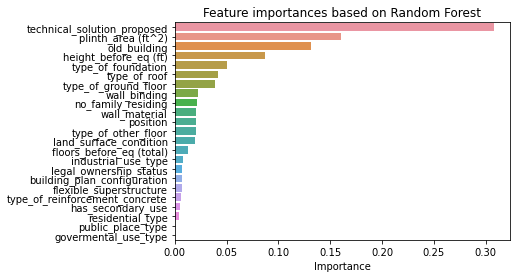

In [34]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.title("Feature importances based on Random Forest")
plt.xlabel("Importance")
sns.barplot(x=importances[indices][:25], y=X_train.columns[indices][:25])

In [42]:
selected_features = X_train.columns[indices][:25]
X_train_imp = X_train[selected_features]
X_test_imp = X_test[selected_features]

In [35]:
params = {'n_estimators': 905, 'max_depth': 56, 'min_samples_split': 10,
          'min_samples_leaf': 1, 'max_features': 'sqrt'}

rf_imp = RandomForestClassifier(**params, random_state=69420)
rf_imp.fit(X_train_imp, y_train)

y_pred_imp = rf_imp.predict(X_test_imp)

print(f1_score(y_test, y_pred_imp, average="macro"))

0.6684738304036658


In [ ]:
import optuna


def rf_objective(trial):
    params = {
        "n_estimators": 595,
        "max_depth": 60,
        "min_samples_split": 4,
        "min_samples_leaf": 1,
        "max_features": 'sqrt',
        "random_state": trial.suggest_int("random_state", 1, 100000),
    }

    rf = RandomForestClassifier(**params, n_jobs=6)
    rf.fit(X_train_imp, y_train)
    y_pred = rf.predict(X_test_imp)

    return f1_score(y_test, y_pred, average="macro")


study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(rf_objective, n_trials=1000, timeout=600, n_jobs=6)

In [37]:
# tanpa feature engineering

print("Number of finished trials: ", len(study_rf.trials))
print("Best params: ", study_rf.best_params)
print("Best value: ", study_rf.best_value)

Number of finished trials:  100
Best params:  {'n_estimators': 595, 'max_depth': 60, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Best value:  0.6702837845178808


In [55]:
params = {'n_estimators': 595, 'max_depth': 60, 'min_samples_split': 4,
          'min_samples_leaf': 1, 'max_features': 'sqrt'}

rf_best = RandomForestClassifier(**params, random_state=40123)

rf_best.fit(X_train_imp, y_train)

y_pred_best = rf_best.predict(X_test_imp)
print(f1_score(y_test, y_pred_best, average="macro"))


0.6707615895297849


### Submission

In [76]:
test = pd.read_csv("../../dataset/raw/test.csv")
test_clean = clean(test)

test_clean.head()

,id,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,...,has_secondary_use,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material
0,0,2.0,7,418.0,14,2,3.924681,3.747907,3.837207,3.899777,...,0.0,3.739428,3.692359,3.666844,1,3.635343,1,0,3.96323,3.966212
1,1,3.0,13,396.0,21,2,3.924681,3.810115,3.741800,3.899777,...,0.0,3.739428,3.692359,3.666844,1,3.635343,1,0,3.96323,3.966212
2,2,3.0,40,400.0,18,2,3.924681,3.747907,3.837207,3.899777,...,0.0,3.739428,3.692359,3.666844,1,3.635343,1,0,3.96323,3.966212
3,3,2.0,25,378.0,20,2,2.491733,3.810115,3.847860,3.899777,...,0.0,3.739428,3.692359,3.666844,1,3.635343,1,0,3.96323,3.966212
4,4,2.0,5,375.0,20,2,3.929950,3.743924,3.837207,3.899777,...,0.0,3.739428,3.692359,3.666844,1,3.635343,1,0,3.96323,3.966212


In [77]:
test_clean.shape

(242082, 24)

In [61]:
test_clean.to_csv("../../dataset/processed/test_encoded_v3.csv", index=False)

In [64]:
X_submission = test_clean[selected_features]
y_submission = rf_best.predict(X_submission)
y_submission+=1
submission = pd.DataFrame({
    "id": np.arange(test_clean.shape[0]),
    "damage_grade": y_submission
})

submission.to_csv("../../dataset/submission_tebeoenoS_rf.csv", index=False)